In [1]:
from collections import Counter
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import pandas as pd
import argparse
from scipy.stats import chisquare

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.basemap import Basemap as Basemap

from scipy import stats

def get_agglo(values, k):
  X = np.array(values).reshape(-1, 1)

  agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')

  # Fit the model to the data
  agg_clustering.fit(X)

  labels = agg_clustering.labels_

  return labels

def get_agglo_2d(x,y,k):
  X = np.array(x).reshape(-1, 1)
  Y = np.array(y).reshape(-1, 1)

  agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')

  # Fit the model to the data
  agg_clustering.fit(np.concatenate((X, Y), axis=1))

  labels = agg_clustering.labels_

  return labels

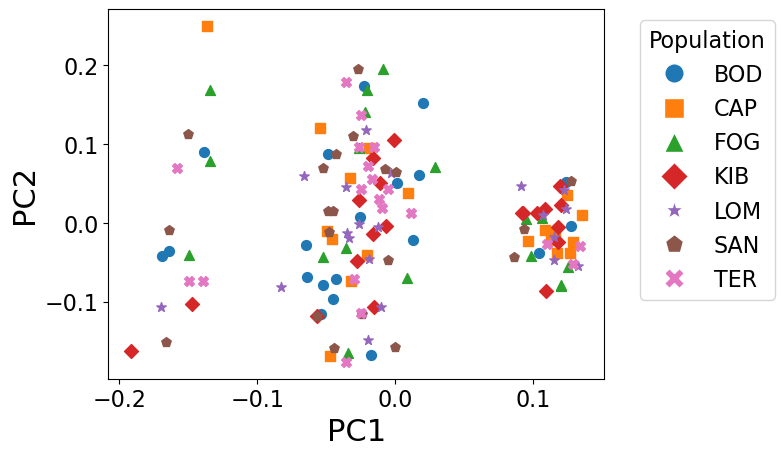

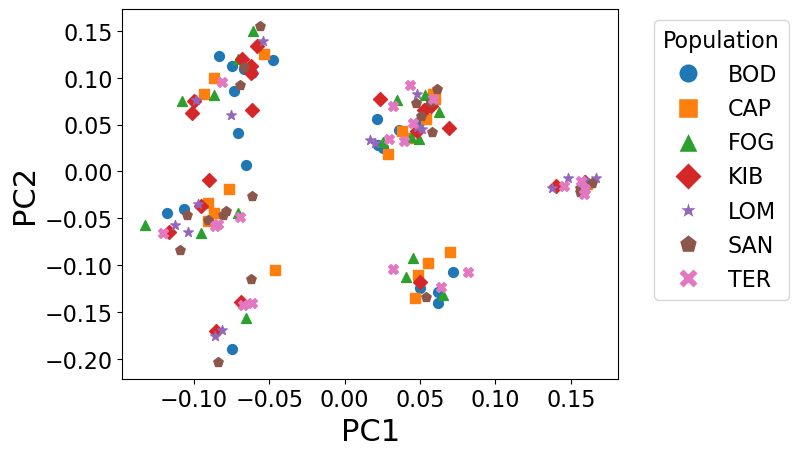

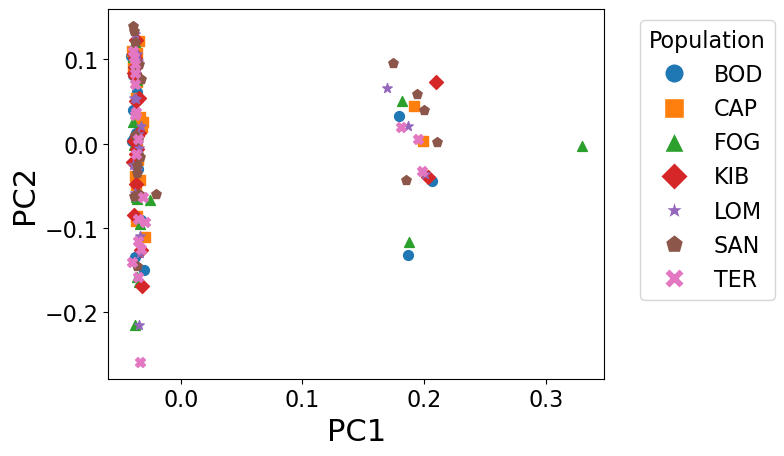

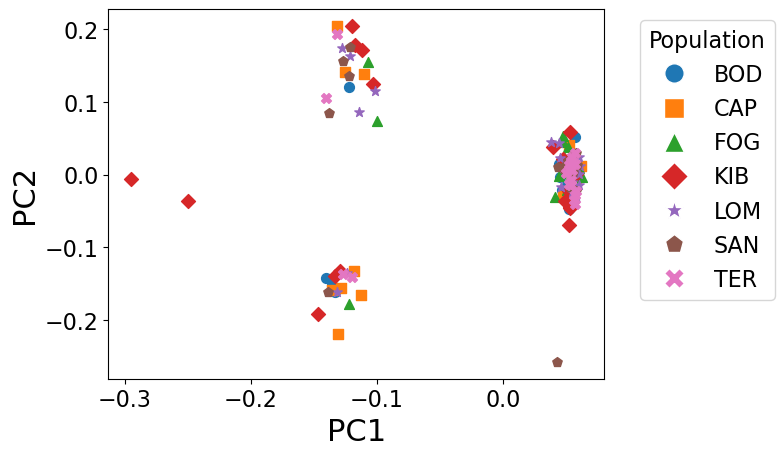

In [6]:
#Make PCA where markers show population of origin

#Population labels

pops=["BOD", "CAP", "FOG", "KIB", "LOM", "SAN", "TER"]
tpop=[]
for p in pops:
  if p != "CAP" and p!= "FOG":
    tpop.append([p] * 20)
  else:
    if p == "CAP":
      tpop.append([p] * 19)
    if p == "FOG":
      tpop.append([p] * 18)
pops=np.array([x for xs in tpop for x in xs])

#Set up for plotting

colors=["yellow","green","purple",'red', 'blue', 'orange', 'cyan', 'magenta', 'brown', 'lime']
colors = plt.cm.tab10.colors #['blue', 'green', 'red', 'purple', 'orange', 'brown', 'magenta']
markers = ['o', 's', '^', 'D', '*', 'p', 'X']

coldic={}
c=0
for p in pops:
    if p not in coldic.keys():
        coldic[p] = colors[c]
        c+=1

mardic={}
c=0
for p in pops:
    if p not in mardic.keys():
        mardic[p] = markers[c]
        c+=1

#Read and prepare data

pca_files = ["NW_022145594.1_12702886_16793794", "NW_022145601.1_28950395_29566247", "NW_022145609.1_29427741_29776196", "NW_022145594.1_39429440_42445994"]
invs = [1,5,8,2]

inv_counter=0
for p in pca_files:
  file = f"intermediary_files/inv{invs[inv_counter]}/{p}"

  df1 = f"{file}_dim1.csv"
  df2 = f"{file}_dim2.csv"
  k=3
  perc_explained = f"{file}_perc_explained.csv"

  df1=pd.read_csv(df1)
  df2=pd.read_csv(df2)
  dim1=df1["dim1"].tolist()
  dim2=df2["dim2"].tolist()

  for i in range(len(df1["dim1"])):
      plt.scatter(df1["dim1"].to_list()[i], df2["dim2"].to_list()[i],color=coldic[pops[i]],marker=mardic[pops[i]],s=50)

  legend_handles = []
  c=0
  for label, color in coldic.items():
      legend_handles.append(plt.Line2D([0], [0], marker=mardic[label], color='w', markerfacecolor=color, markersize=14, label=label))
      c+=1

  plt.legend(handles=legend_handles,loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=16,title="Population",title_fontsize=16)

  plt.ylabel("PC2", fontsize=22)
  plt.xlabel("PC1", fontsize=22)
  plt.tick_params(axis='both', which='major', labelsize=16)

  plt.savefig(f"intermediary_files/inv{invs[inv_counter]}/inv{invs[inv_counter]}_pop_PCA.pdf", format='pdf', bbox_inches='tight')
  inv_counter+=1
  plt.show()

In [10]:
# 6 WAY GROUPING for inversion 5

p = "NW_022145601.1_28950395_29566247"
invs = 5
file = f"intermediary_files/inv{invs}/{p}"

df1 = f"{file}_dim1.csv"
df2 = f"{file}_dim2.csv"
k=3
perc_explained = f"{file}_perc_explained.csv"

df1=pd.read_csv(df1)
df2=pd.read_csv(df2)
dim1=df1["dim1"].tolist()
dim2=df2["dim2"].tolist()

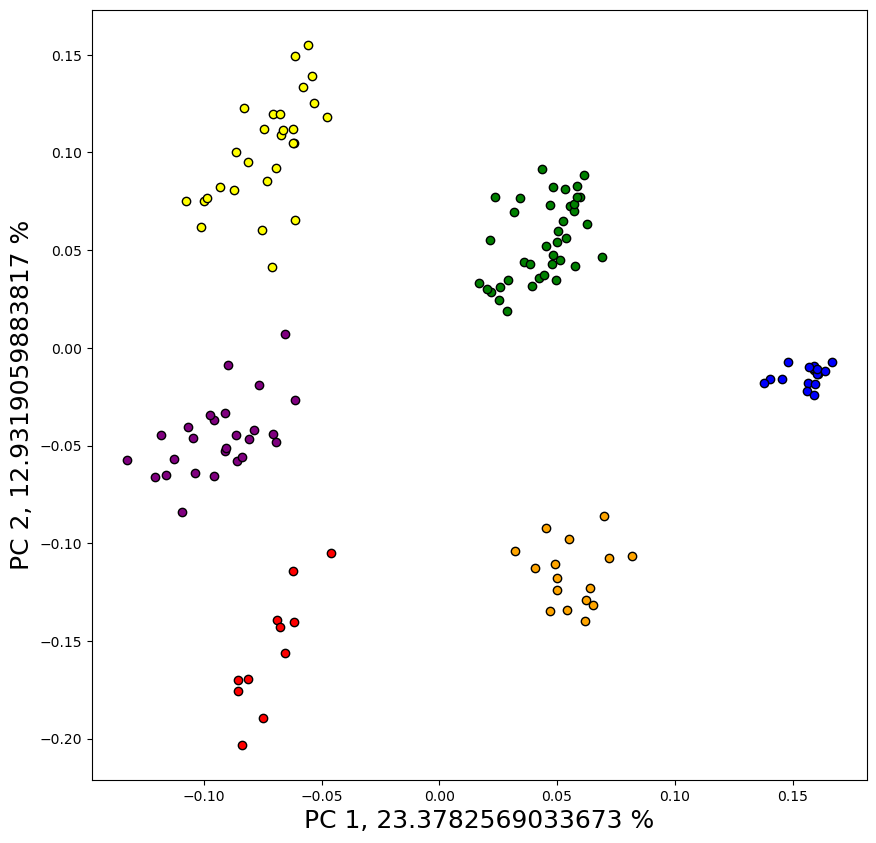

In [11]:
#Preparing for 6 WAY GROUPING

pe=pd.read_csv(perc_explained,names=["pes"])
pes_list=pe.pes.to_list()

dim=np.array(list(zip(dim1,dim2)))
ind_id=np.array(list(range(1,len(pops)+1)))

NUM_CLUST = 6

#Clustering

if NUM_CLUST == 3:
  clusts=get_agglo(dim1, NUM_CLUST)
else:
  clusts=get_agglo_2d(dim1,dim2,NUM_CLUST)

#Plotting

all_cols=["yellow","green","purple",'red', 'blue', 'orange', 'cyan', 'magenta', 'brown', 'lime']
p_colors= all_cols[:NUM_CLUST]
pca_colors = ["purple", "green","yellow"]

f, axs = plt.subplots(figsize=(10, 10))

gts=["AC", "BC", "AB", "AA", "CC", "BB"]

pop_dic={}
id_dic={}
for c in range(NUM_CLUST):
  t=np.where(np.array(clusts) == c)[0]
  #print(c, p_colors[c])
  #print(len(t))
  x=[i[0] for i in dim[t]]
  y=[i[1] for i in dim[t]]
  plt.scatter(x,y,edgecolors="black",c=p_colors[c])
  avx=sum(x)/len(x)
  ids=pops[t]
  pop_dic[c]=[avx,ids]
  id_dic[c]=[avx,ind_id[t]]
plt.ylabel("PC 2, "+str(pes_list[1])+" %",fontsize=18)
plt.xlabel("PC 1, "+str(pes_list[0])+" %",fontsize=18)
plt.show()

In [12]:
#Genotype correlation

pops=["KIB", "LOM", "SAN", "TER"]
x=np.repeat(np.array(["BOD"]),20,axis=0)
b=np.repeat(np.array(["CAP"]),19,axis=0)
a=np.repeat(np.array(["FOG"]),18,axis=0)
c=np.repeat(np.array(pops),20,axis=0)
pops=np.concatenate([x,b,a,c])

pdic=defaultdict(list)
pdic2=defaultdict(list)
for i in range(len(clusts)):
    mk=gts[clusts[i]]
    pdic[mk].append(pops[i])
    pdic2[pops[i]].append(gts[clusts[i]])

#Turning it into allele frequencies, from genotypes
pdic3=defaultdict(list)
for k in pdic.keys():
    #print(k[0],k[1])
    #print(pdic[k])
    for p in pdic[k]:
        pdic3[p].append(k[0])
        pdic3[p].append(k[1])

pdic4=defaultdict(list)
for k in pdic3.keys():
    for k2 in Counter(pdic3[k]).keys():
        for i in range(Counter(pdic3[k])[k2]):
            pdic4[k2].append(k)

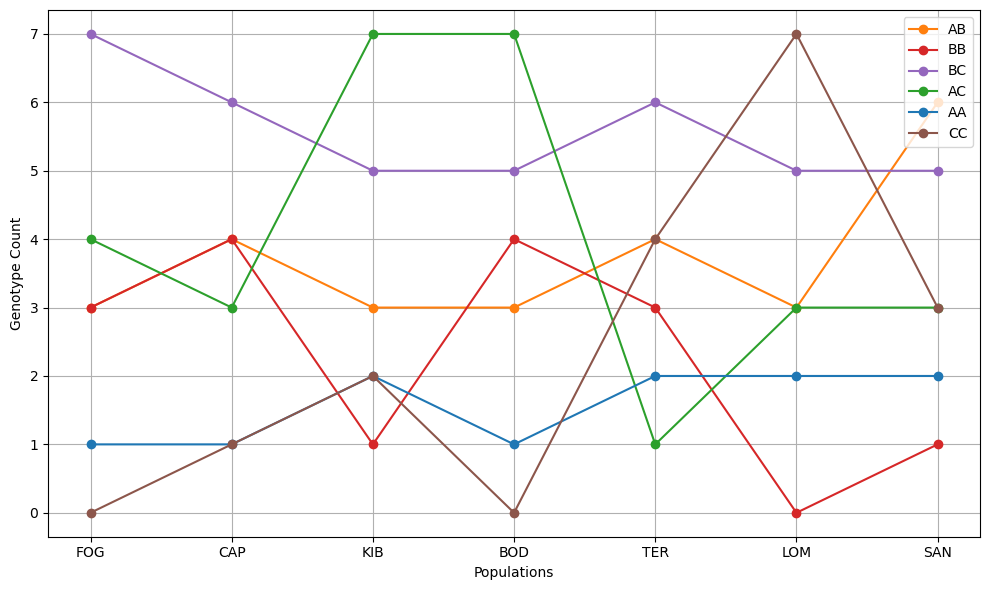

In [13]:
#Plotting

# Sample dictionary with three-letter strings as values
data = pdic
# Get all unique three-letter strings across all keys
all_strings = set([item for sublist in data.values() for item in sublist])
all_strings = sorted(all_strings)  # Sorting for consistent x-axis order

color_mapping = {
    'AA': 'C0',
    'AB': 'C1',
    'AC': 'C2',
    'BB': 'C3',
    'BC': 'C4',
    'CC': 'C5'
}

custom_order = ["FOG","CAP","KIB","BOD","TER","LOM","SAN"]

plt.figure(figsize=(10, 6))

for key, values in data.items():
    counts = Counter(values)
    y_values = [counts[string] for string in custom_order]
    plt.plot(custom_order, y_values, marker='o', label=key,color=color_mapping.get(key, 'black'))

plt.xlabel('Populations')
plt.ylabel('Genotype Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [14]:
#HW equalibrium

A=len(pdic4["A"])
B=len(pdic4["B"])
C=len(pdic4["C"])

obs=[]
exp=[]
for k in pdic.keys(): #all possible genotypes
    obs.append(len(pdic[k]))
    print(k)
    frq0=len(pdic4[k[0]])/(137*2)
    frq1=len(pdic4[k[1]])/(137*2)
    if k[0] == k[1]: #homozygote
        genoexp = frq0*frq0*137
    else:
        genoexp = 2*frq0*frq1*137
    exp.append(genoexp)

result = chisquare(f_obs=obs, f_exp=exp)
print(result)

AB
BB
BC
AC
AA
CC
Power_divergenceResult(statistic=0.5647299779506201, pvalue=0.9895610937661241)
